# Problem set #8
# MACS 30100 Dr. Evans
## By Cooper Nederhood

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

path = "../../../ProblemSets/PS8/data/"
file = "strongdrink.txt"
df = pd.read_csv(path+file)
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### (1a): Scatterplot of alco and color_int for each of the 3 cultivars

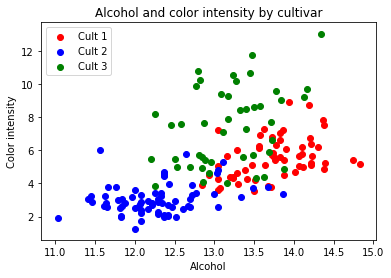

In [19]:
is_1 = df.cultivar == 1
is_2 = df.cultivar == 2
is_3 = df.cultivar == 3

plt.scatter(df[is_1].alco, df[is_1].color_int, color='r', label="Cult 1")
plt.scatter(df[is_2].alco, df[is_2].color_int, color='b', label="Cult 2")
plt.scatter(df[is_3].alco, df[is_3].color_int, color='g', label="Cult 3")
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")
plt.title("Alcohol and color intensity by cultivar")
plt.legend()
plt.show()

In [41]:
x_variable_names = ['alco', 'malic', 'tot_phen', 'color_int']
y_name = ['cultivar']
Xvars = df[x_variable_names].values
yvals = df[y_name].values

### (1b): Uses sklearn to fit multinomial logit. Use k-fold cross validation to estimate MSE. Play with param values of penalty and C to get lowest possible k-fold MSE. Report the MSE and param results from this procedure

In [70]:
k = 4
kf = KFold(n_splits = k, random_state=22, shuffle=True)

mse_logit = np.zeros(k)
mse_list = []

# iterate over possible values of C
for c_test in np.linspace(.01, 5, 100):
    
    k_ind = 0
    c_mse_splits = []
    for train_index, test_index in kf.split(Xvars):
        
        X_train, X_test = Xvars[train_index], Xvars[test_index]
        y_train, y_test = yvars[train_index], yvars[test_index]
        
        log_reg = LogisticRegression(multi_class='multinomial', 
                                     fit_intercept=True, solver='newton-cg', C=c_test)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        mse = ((y_test != y_pred) ** 2).mean()
        
        c_mse_splits.append(mse)
    assert len(c_mse_splits) == 4
    
    c_mse = np.mean(c_mse_splits)    
    results = (c_mse, c_test)
    
    mse_list.append( results )

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
mse_list.sort()
mse_list[:10]

[(0.6411415289256198, 0.01),
 (0.6450154958677686, 0.06040404040404041),
 (0.6472107438016529, 0.11080808080808081),
 (0.6474690082644629, 0.6652525252525253),
 (0.6474690082644629, 0.7156565656565658),
 (0.6474690082644629, 0.7660606060606061),
 (0.6474690082644629, 0.8164646464646466),
 (0.6474690082644629, 0.866868686868687),
 (0.6474690082644629, 0.9172727272727274),
 (0.6474690082644629, 0.9676767676767678)]

The default value for C=1, so I run the k-folds analysis from .01 to 5. The output MSE is not very sensitive to C but I find a min MSE of .6411 at C=0.01

### (1c): Use sklearn to fit the model in part b using a Random Forest classifier with bootstrap = True, oob_score=True, and random_state=22. Use OOB cross-validation to get MSE. Play with param values of n_estimators, max_depth, min_sample_leaf. Report the MSE and param values from this procedure.

In [87]:
results = []
for n_est in range(10, 200, 25):
    for min_sample in range(1, 10, 1):
        for max_d in range(1, 10, 1):
            
            print("n_est={}, min_sample={}, max_d={}".format(n_est, min_sample, max_d))
            RF = RandomForestClassifier(n_estimators = n_est,
                                     min_samples_leaf = min_sample,
                                      max_depth = max_d,
                                         bootstrap=True, 
                                      oob_score=True, random_state=22)
            RF.fit(Xvars, yvals)
            score = 1-RF.oob_score_
            
            
            r = (score, n_est, min_sample, max_d)
            #print(r)
            results.append(r)



n_est=10, min_sample=1, max_d=1
n_est=10, min_sample=1, max_d=2
n_est=10, min_sample=1, max_d=3
n_est=10, min_sample=1, max_d=4
n_est=10, min_sample=1, max_d=5
n_est=10, min_sample=1, max_d=6
n_est=10, min_sample=1, max_d=7
n_est=10, min_sample=1, max_d=8
n_est=10, min_sample=1, max_d=9
n_est=10, min_sample=2, max_d=1
n_est=10, min_sample=2, max_d=2
n_est=10, min_sample=2, max_d=3
n_est=10, min_sample=2, max_d=4
n_est=10, min_sample=2, max_d=5
n_est=10, min_sample=2, max_d=6
n_est=10, min_sample=2, max_d=7
n_est=10, min_sample=2, max_d=8
n_est=10, min_sample=2, max_d=9
n_est=10, min_sample=3, max_d=1
n_est=10, min_sample=3, max_d=2
n_est=10, min_sample=3, max_d=3
n_est=10, min_sample=3, max_d=4
n_est=10, min_sample=3, max_d=5
n_est=10, min_sample=3, max_d=6
n_est=10, min_sample=3, max_d=7
n_est=10, min_sample=3, max_d=8
n_est=10, min_sample=3, max_d=9
n_est=10, min_sample=4, max_d=1
n_est=10, min_sample=4, max_d=2
n_est=10, min_sample=4, max_d=3
n_est=10, min_sample=4, max_d=4
n_est=10

n_est=85, min_sample=2, max_d=7
n_est=85, min_sample=2, max_d=8
n_est=85, min_sample=2, max_d=9
n_est=85, min_sample=3, max_d=1
n_est=85, min_sample=3, max_d=2
n_est=85, min_sample=3, max_d=3
n_est=85, min_sample=3, max_d=4
n_est=85, min_sample=3, max_d=5
n_est=85, min_sample=3, max_d=6
n_est=85, min_sample=3, max_d=7
n_est=85, min_sample=3, max_d=8
n_est=85, min_sample=3, max_d=9
n_est=85, min_sample=4, max_d=1
n_est=85, min_sample=4, max_d=2
n_est=85, min_sample=4, max_d=3
n_est=85, min_sample=4, max_d=4
n_est=85, min_sample=4, max_d=5
n_est=85, min_sample=4, max_d=6
n_est=85, min_sample=4, max_d=7
n_est=85, min_sample=4, max_d=8
n_est=85, min_sample=4, max_d=9
n_est=85, min_sample=5, max_d=1
n_est=85, min_sample=5, max_d=2
n_est=85, min_sample=5, max_d=3
n_est=85, min_sample=5, max_d=4
n_est=85, min_sample=5, max_d=5
n_est=85, min_sample=5, max_d=6
n_est=85, min_sample=5, max_d=7
n_est=85, min_sample=5, max_d=8
n_est=85, min_sample=5, max_d=9
n_est=85, min_sample=6, max_d=1
n_est=85

n_est=160, min_sample=3, max_d=6
n_est=160, min_sample=3, max_d=7
n_est=160, min_sample=3, max_d=8
n_est=160, min_sample=3, max_d=9
n_est=160, min_sample=4, max_d=1
n_est=160, min_sample=4, max_d=2
n_est=160, min_sample=4, max_d=3
n_est=160, min_sample=4, max_d=4
n_est=160, min_sample=4, max_d=5
n_est=160, min_sample=4, max_d=6
n_est=160, min_sample=4, max_d=7
n_est=160, min_sample=4, max_d=8
n_est=160, min_sample=4, max_d=9
n_est=160, min_sample=5, max_d=1
n_est=160, min_sample=5, max_d=2
n_est=160, min_sample=5, max_d=3
n_est=160, min_sample=5, max_d=4
n_est=160, min_sample=5, max_d=5
n_est=160, min_sample=5, max_d=6
n_est=160, min_sample=5, max_d=7
n_est=160, min_sample=5, max_d=8
n_est=160, min_sample=5, max_d=9
n_est=160, min_sample=6, max_d=1
n_est=160, min_sample=6, max_d=2
n_est=160, min_sample=6, max_d=3
n_est=160, min_sample=6, max_d=4
n_est=160, min_sample=6, max_d=5
n_est=160, min_sample=6, max_d=6
n_est=160, min_sample=6, max_d=7
n_est=160, min_sample=6, max_d=8
n_est=160,

In [86]:
# Sort results and print
results.sort()
results[:10]

[(0.05681818181818177, 85, 2, 5),
 (0.05681818181818177, 85, 2, 6),
 (0.05681818181818177, 85, 2, 7),
 (0.05681818181818177, 85, 2, 8),
 (0.05681818181818177, 85, 2, 9),
 (0.0625, 35, 2, 5),
 (0.0625, 60, 2, 5),
 (0.0625, 60, 2, 6),
 (0.0625, 60, 2, 7),
 (0.0625, 60, 2, 8)]

As shown above we can shrink the error rate to .056 by using n_est = 85, min_sample = 2, and max_depth from 5-9.

### (1d): Use sklearn to fit the model in part b using a SVM. Do k-folds with k=4 as in part b. Play with param values of C and gamma. Report the MSE and param values from this procedure.

In [105]:
k = 4
kf = KFold(n_splits = k, random_state=22, shuffle=True)
kf.get_n_splits(Xvars)
mse_list = []

# iterate over possible values of gamme and C
for gamma_test in np.linspace(.04, 4, 10):
    for c_test in np.linspace(.04, 4, 10):

        k_ind = 0
        c_mse_splits = []
        for train_index, test_index in kf.split(Xvars):

            X_train, X_test = Xvars[train_index], Xvars[test_index]
            y_train, y_test = yvars[train_index], yvars[test_index]

            svc = svm.SVC(kernel='rbf', gamma = 1.7, C=1)
            svc.fit(X_train, y_train)    

            y_pred = svc.predict(X_test)
            mse = ((y_test != y_pred) ** 2).mean()

            c_mse_splits.append(mse)
        assert len(c_mse_splits) == 4

        c_mse = np.mean(c_mse_splits)    
        results = (c_mse, c_test, gamma_test)

        mse_list.append( results )
    

In [106]:
mse_list.sort()
mse_list[:10]

[(0.6487603305785125, 0.04, 0.04),
 (0.6487603305785125, 0.04, 0.48),
 (0.6487603305785125, 0.04, 0.92),
 (0.6487603305785125, 0.04, 1.36),
 (0.6487603305785125, 0.04, 1.8),
 (0.6487603305785125, 0.04, 2.24),
 (0.6487603305785125, 0.04, 2.68),
 (0.6487603305785125, 0.04, 3.12),
 (0.6487603305785125, 0.04, 3.56),
 (0.6487603305785125, 0.04, 4.0)]

There appears to be an error in the estimation code because the MSE is essentially stuck at .64. Regardless, the result of the 'regression fishing' is an optimal, mse-minimizig params of 0.04 and 0.04

### (1e): Use sklearn to fit the model to MLPC. Repeat k-folds with k=4. Play with params hidden_layer_sizes, activation, and alpha. Report the MSE and param values from this procedure.

In [109]:
k = 4
kf = KFold(n_splits = k, random_state=22, shuffle=True)
kf.get_n_splits(Xvars)
mse_list = []

# iterate over possible values of C
for activ in ['identity', 'logistic', 'tanh', 'relu']:
    for a in np.linspace(.04, 1, 2):
        for layer in range(100, 200, 50):
            k_ind = 0
            c_mse_splits = []
            for train_index, test_index in kf.split(Xvars):

                X_train, X_test = Xvars[train_index], Xvars[test_index]
                y_train, y_test = yvars[train_index], yvars[test_index]

                mlpc = MLPClassifier(activation=activ, solver='lbfgs',
                                        alpha=a, random_state=25,
                                        hidden_layer_sizes = layer)
                mlpc.fit(X_train, y_train)    

                y_pred = mlpc.predict(X_test)
                mse = ((y_test != y_pred) ** 2).mean()

                c_mse_splits.append(mse)
            assert len(c_mse_splits) == 4

            c_mse = np.mean(c_mse_splits)    
            results = (c_mse, activ, a, layer)
            print(results)

            mse_list.append( results )
    

(0.647210743801653, 'identity', 0.04, 100)
(0.647210743801653, 'identity', 0.04, 150)
(0.6485020661157025, 'identity', 1.0, 100)
(0.6485020661157025, 'identity', 1.0, 150)
(0.646823347107438, 'logistic', 0.04, 100)
(0.6443698347107438, 'logistic', 0.04, 150)
(0.6464359504132232, 'logistic', 1.0, 100)
(0.6464359504132232, 'logistic', 1.0, 150)
(0.6430785123966942, 'tanh', 0.04, 100)
(0.6402376033057852, 'tanh', 0.04, 150)
(0.6466942148760331, 'tanh', 1.0, 100)
(0.6460485537190083, 'tanh', 1.0, 150)
(0.6452737603305785, 'relu', 0.04, 100)
(0.6461776859504132, 'relu', 0.04, 150)
(0.6465650826446281, 'relu', 1.0, 100)
(0.6478564049586777, 'relu', 1.0, 150)


In [111]:
mse_list.sort()
mse_list[:10]

[(0.6402376033057852, 'tanh', 0.04, 150),
 (0.6430785123966942, 'tanh', 0.04, 100),
 (0.6443698347107438, 'logistic', 0.04, 150),
 (0.6452737603305785, 'relu', 0.04, 100),
 (0.6460485537190083, 'tanh', 1.0, 150),
 (0.6461776859504132, 'relu', 0.04, 150),
 (0.6464359504132232, 'logistic', 1.0, 100),
 (0.6464359504132232, 'logistic', 1.0, 150),
 (0.6465650826446281, 'relu', 1.0, 100),
 (0.6466942148760331, 'tanh', 1.0, 100)]

Again, There still appears to be an error in the estimation code because the MSE is essentially stuck at .64. Regardless, the result of the 'regression fishing' is an optimal, mse-minimizig params of 0.04 and 0.04

### (1f): Which of the above four models is the best predictor? Why?

I would expect the nueral net to have the best predictive power because it has the greatest flexibiity in its functional form. Assuming we have tuned the model correctly, the NN would be the most predictive.